In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
usage = pd.read_csv('usage_data.csv')
usage.head()

,Asset,Time,Use
0,A403193,5,31194.652034
1,A403193,17,31223.536355
2,A403193,56,31362.706261
3,A403193,124,31701.440562
4,A403193,144,31724.489666


In [3]:
usage.shape

(22828, 3)

In [4]:
usage.isna().sum()

Asset    0
Time     0
Use      0
dtype: int64

In [5]:
duplicate = usage.duplicated()
duplicate.sum()

315

In [6]:
usage.drop_duplicates(inplace=True)

In [7]:
usage.shape

(22513, 3)

In [8]:
m_part_consumption = pd.read_csv('maintenance_part_consumption.csv')
m_part_consumption.head()

,Asset,Time,Reason,Part,Quantity
0,A311482,0,R417,P361646,1
1,A174613,0,R707,P991287,1
2,A174613,0,R707,P169319,1
3,A060723,0,R193,P184448,0
4,A174613,0,R707,P097048,1


In [9]:
m_part_consumption.shape

(270830, 5)

In [10]:
m_part_consumption.isna().sum()

Asset       0
Time        0
Reason      0
Part        0
Quantity    0
dtype: int64

In [11]:
m_part_consumption.duplicated().sum()

49258

In [12]:
m_part_consumption.drop_duplicates(inplace=True)
m_part_consumption.shape

(221572, 5)

In [13]:
m_part_consumption.describe(include='all')

,Asset,Time,Reason,Part,Quantity
count,221572,221572.000000,221572,221572,221572.000000
unique,1913,NaN,14,3192,NaN
top,A998987,NaN,R707,P528448,NaN
freq,422,NaN,108503,6600,NaN
mean,NaN,376.523157,NaN,NaN,4.127390
std,NaN,214.430170,NaN,NaN,22.532809
min,NaN,0.000000,NaN,NaN,-15.000000
25%,NaN,188.000000,NaN,NaN,1.000000
50%,NaN,382.000000,NaN,NaN,1.000000
75%,NaN,569.000000,NaN,NaN,2.000000


In [14]:
m_part_consumption.query('Quantity<0')

,Asset,Time,Reason,Part,Quantity
72268,A217825,209,R193,P085348,-2
155111,A024432,444,R193,P573388,-4
164794,A452161,467,R446,P481975,-1
183249,A768609,516,R193,P169319,-3
184996,A156160,521,R193,P764767,-1
207910,A771588,578,R193,P002198,-5
226080,A384922,621,R565,P169319,-4
231637,A150144,635,R193,P034735,-1
233174,A563025,638,R565,P427071,-5
260508,A366762,708,R446,P476637,-15


In [15]:
m_part_consumption['Quantity'] = abs(m_part_consumption['Quantity'])

In [16]:
m_part_consumption.query('Quantity<0')

,Asset,Time,Reason,Part,Quantity


In [17]:
m_failure = pd.read_csv('maintenance_failure.csv')
m_failure.head()

,Asset,failure_bin
0,A003146,0.0
1,A046288,0.0
2,A082667,NaN
3,A115725,1.0
4,A148200,NaN


In [18]:
m_failure.shape

(1819, 2)

In [19]:
m_failure.isna().sum()

Asset            0
failure_bin    195
dtype: int64

In [20]:
m_failure.duplicated().sum()

0

Convert Usage Data table into the following columns.
Using the Groupby function we will create the following columns:

Age_initial - It is the Time when the Asset reported first for maintenance service

Age_lastknown - It is the Time when the Asset reported last for maintenance service

Fleet_serviced_count - Using the Unique Time count we are finding the Asset visits for maintenance service

Distance_initial - The Distance traveled by the Asset when reported first for maintenance service

Distance_lastknown - The Distance traveled by the Asset when reported last for maintenance service. 

Using the above data we would further investigate the total time spent and the total distance traveled by the Asset for maintenance service.

In [70]:
usage.head(5)

,Asset,Time,Use
0,A403193,5,31194.652034
1,A403193,17,31223.536355
2,A403193,56,31362.706261
3,A403193,124,31701.440562
4,A403193,144,31724.489666


In [21]:
usage_data_groups = usage.groupby('Asset', as_index=False).agg(Age_initial=('Time',min), Age_last_known=('Time',max),
                                               Fleet_service_count=('Time','nunique'),
                                              Distance_initial=('Use',min),
                                              Distance_lastknown=('Use', max)
                                              ).round(2)
usage_data_groups

,Asset,Age_initial,Age_last_known,Fleet_service_count,Distance_initial,Distance_lastknown
0,A000204,46,722,15,31449.65,33212.76
1,A000270,435,617,3,26378.56,27036.77
2,A000463,30,616,18,30451.54,31894.00
3,A000495,6,695,16,30851.25,32540.25
4,A001201,395,720,7,26136.39,27187.90
...,...,...,...,...,...,...
1889,A998424,516,678,2,26189.20,26923.27
1890,A998861,108,664,10,31938.93,33306.13
1891,A998987,25,524,17,30849.50,32224.28
1892,A999836,59,719,12,26511.89,29192.59


In [22]:
# After converting the Usage Data table to the new version. What is the Fleet_serviced_count for Asset “A000495”?
usage_data_groups.query("Asset =='A000495'")

,Asset,Age_initial,Age_last_known,Fleet_service_count,Distance_initial,Distance_lastknown
3,A000495,6,695,16,30851.25,32540.25


In [23]:
m_part_consumption.drop(['Time'], axis=1, inplace=True)

In [24]:
m_part_consumption

,Asset,Reason,Part,Quantity
0,A311482,R417,P361646,1
1,A174613,R707,P991287,1
2,A174613,R707,P169319,1
3,A060723,R193,P184448,0
4,A174613,R707,P097048,1
...,...,...,...,...
270825,A634532,R707,P079223,1
270826,A634532,R707,P762803,1
270827,A634532,R707,P839776,1
270828,A634532,R707,P222591,1


As each asset can have multiple failure reasons and each reason might need multiple parts of different quantities for the maintenance. So we will pivot the table based on Asset, columns as Reason, and values as Quantity and Parts. Use the following code to pivot.

In [25]:
maintenance_part_consumption_pivottable_part = pd.pivot_table(
    m_part_consumption,
    values=["Quantity", "Part"],
    index=["Asset"],
    columns=["Reason"],
    aggfunc={"Quantity": np.sum, "Part": lambda x: len(x.unique())},
    fill_value=0,
)
maintenance_part_consumption_pivottable_part

Part                                               ... Quantity       \
Reason  R044 R064 R119 R193 R364 R396 R417 R446 R565 R575  ...     R364 R396   
Asset                                                      ...                 
A000204    0    0    6   44    3    0    0    3   26    0  ...        3    0   
A000270    0    0    0    0    0    0    0    0    0    0  ...        0    0   
A000463    0    0    3   36    1    0    0    5    0    0  ...        1    0   
A000495    0    0    5   38    9    0    0   20   36    0  ...       13    0   
A001201    0    0    0    5    0    0    0    0    0    0  ...        0    0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...  ...   
A998424    0    0    0    0    3    0    0    0    0    0  ...        3    0   
A998861    0    0    0   19    0    0    0    6    7    0  ...        0    0   
A998987    0    0  254   31    1    0    0    5   41    0  ...        1    0   
A999836    0    0    0    4    8    0    0    0   40    0  ...       19    0   
A999952    0    0    0   19    2    0    0    0   12    0  ...        2    0   

                                                 
Reason  R417 R446 R565 R575 R606 R707 R782 R783  
Asset                                            
A000204    0    3  104    0    0  178    0    0  
A000270    0    0    0    0    0  106    0    0  
A000463    0    5    0    0    0  226    0    6  
A000495    0   36  382    0    0  130    0    0  
A001201    0    0    0    0    0   85    0    0  
...      ...  ...  ...  ...  ...  ...  ...  ...  
A998424    0    0    0    0    0  124    0    0  
A998861    0    6   54    0    0  152    0    0  
A998987    0    5   92    0    0   99    0    0  
A999836    0    0  160    0    0  167    0    1  
A999952    0    0   78    0    0  530    0    0  

[1913 rows x 28 columns]

In [26]:
# After pivoting successfully, How many unique parts were used for the asset A006104 for the failure reason R565?
maintenance_part_consumption_pivottable_part.query("Asset =='A006104' ")

Part                                               ... Quantity       \
Reason  R044 R064 R119 R193 R364 R396 R417 R446 R565 R575  ...     R364 R396   
Asset                                                      ...                 
A006104    0    0    0   10    1    0    0    0   38    0  ...        1    0   

                                                 
Reason  R417 R446 R565 R575 R606 R707 R782 R783  
Asset                                            
A006104    0    0  113    0    0  134    0    0  

[1 rows x 28 columns]

In [27]:
maintenance_part_consumption_pivottable_part.head(20)

Part                                               ... Quantity       \
Reason  R044 R064 R119 R193 R364 R396 R417 R446 R565 R575  ...     R364 R396   
Asset                                                      ...                 
A000204    0    0    6   44    3    0    0    3   26    0  ...        3    0   
A000270    0    0    0    0    0    0    0    0    0    0  ...        0    0   
A000463    0    0    3   36    1    0    0    5    0    0  ...        1    0   
A000495    0    0    5   38    9    0    0   20   36    0  ...       13    0   
A001201    0    0    0    5    0    0    0    0    0    0  ...        0    0   
A001215    0    0    0    6    1    0    0    3   36    0  ...        1    0   
A002431    0    0    0    0    2    0    0    2    0    0  ...        2    0   
A002551    0    0    0    6    1    0    0    4   42    1  ...        0    0   
A002941    0    0    0   14    2    0    0    3   49    1  ...        2    0   
A003120    0    0    0   11    0    0    2    5   39    0  ...        0    0   
A003146    0    0    0   19    1    0    0    0    0    0  ...        1    0   
A003569    0    0    0    0   11    0    0    0    0    0  ...       15    0   
A003641    0    0    0   23    1    0   25   15    0    0  ...        1    0   
A003825    0    0    0    0    4    0   20    9   12    0  ...        5    0   
A006032    0    0    0   32    0    0   16    0   35    0  ...        0    0   
A006104    0    0    0   10    1    0    0    0   38    0  ...        1    0   
A006503    0    0    0   15    5    0    0    0   17    0  ...       19    0   
A006787    0    0    0    2    3    0    0    7    0    0  ...       14    0   
A007567    0    0    0    3    1    0    0    9   30    0  ...        1    0   
A009533    0    0    0    9    3    0    0    1   55    0  ...        3    0   

                                                 
Reason  R417 R446 R565 R575 R606 R707 R782 R783  
Asset                                            
A000204    0    3  104    0    0  178    0    0  
A000270    0    0    0    0    0  106    0    0  
A000463    0    5    0    0    0  226    0    6  
A000495    0   36  382    0    0  130    0    0  
A001201    0    0    0    0    0   85    0    0  
A001215    0   14  147    0    0  130    0    0  
A002431    0    2    0    0    0   95    0    0  
A002551    0    5  274    1    0  339    0    1  
A002941    0    3  213    1    0  145    0    0  
A003120    2    5  171    0    0  139    0    0  
A003146    0    0    0    0    0    0    0    0  
A003569    0    0    0    0    0    0    0    0  
A003641   59   43    0    0    0  528    0    1  
A003825   16   18   83    0   95  407    0    1  
A006032  102    0  236    0    0  238    0   13  
A006104    0    0  113    0    0  134    0    0  
A006503    0    0   95    0    0  163    0    4  
A006787    0    9    0    0    0  489    0    3  
A007567    0   15  202    0    0  381    0    3  
A009533    0    1  174    0    0  125    0    0  

[20 rows x 28 columns]

In [28]:
# Maintenance failure data has few missing values.
# It will be difficult(and not efficient also) to impute the values as the failure bin contains only binary values.
# So let's drop it.
m_failure.dropna(subset=['failure_bin'] ,inplace=True)

In [29]:
m_failure

,Asset,failure_bin
0,A003146,0.0
1,A046288,0.0
3,A115725,1.0
5,A187055,0.0
7,A260381,0.0
...,...,...
1814,A845495,0.0
1815,A882703,0.0
1816,A920271,0.0
1817,A948155,0.0


<AxesSubplot:xlabel='Reason', ylabel='reason_of_failure'>

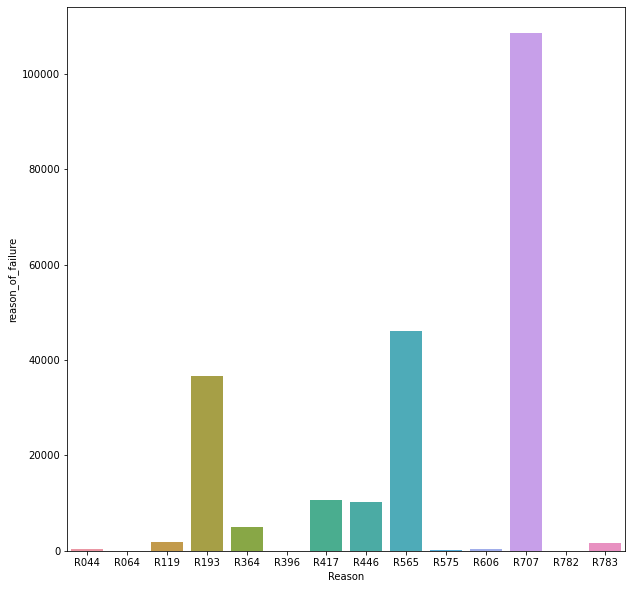

In [30]:
# Select top 3 failure reasons. You can also plot barplot to check visually.
plt.figure(figsize=(10,10))
sn.barplot(x='Reason',y='reason_of_failure', data=m_part_consumption.groupby('Reason')['Reason'].agg([('reason_of_failure', 'count')]).reset_index())


In [31]:
m_part_consumption['Reason'].value_counts()

R707    108503
R565     46157
R193     36554
R417     10657
R446     10163
R364      5071
R119      1854
R783      1666
R044       376
R606       297
R575       222
R064        41
R396        10
R782         1
Name: Reason, dtype: int64

In [32]:
# Total how much quantity of parts were required for following reasons?
maintenance_part_consumption_pivottable_part.loc[:,'Quantity'][['R707','R446']].count()

Reason
R707    1913
R446    1913
dtype: int64

In [33]:
m_part_consumption.head()

,Asset,Reason,Part,Quantity
0,A311482,R417,P361646,1
1,A174613,R707,P991287,1
2,A174613,R707,P169319,1
3,A060723,R193,P184448,0
4,A174613,R707,P097048,1


In [34]:
# Select the top 2 reason which has highest unique parts.
m_part_consumption.groupby('Reason')['Part'].nunique().sort_values(ascending=False)

Reason
R565    2247
R193    1956
R707    1869
R446    1122
R417     980
R119     739
R364     738
R783     505
R044     198
R606     164
R575     119
R064      41
R396      10
R782       1
Name: Part, dtype: int64

In [37]:
y =  m_part_consumption.loc[(m_part_consumption['Reason']=='R064')]['Asset'].unique()

In [38]:
y

array(['A654809', 'A067512'], dtype=object)

In [41]:
# How many unique parts were used for the asset A654809 for the reason R064?
maintenance_part_consumption_pivottable_part.loc['A654809']

          Reason
Part      R044        0
          R064        8
          R119        0
          R193       50
          R364        1
          R396        0
          R417        0
          R446       11
          R565        0
          R575        0
          R606        0
          R707       65
          R782        0
          R783        0
Quantity  R044        0
          R064        8
          R119        0
          R193      163
          R364        2
          R396        0
          R417        0
          R446       15
          R565        0
          R575        0
          R606        0
          R707      495
          R782        0
          R783        0
Name: A654809, dtype: int64

In [49]:
# Which part is most frequently repaired? Enter the part number.
m_part_consumption[m_part_consumption['Quantity']!=0]['Part'].value_counts().reset_index()

,index,Part
0,P528448,6570
1,P446624,6481
2,P212006,6446
3,P663583,5694
4,P415207,5639
...,...,...
3157,P007068,1
3158,P631212,1
3159,P652293,1
3160,P985714,1


In [57]:
# Sum the total quantity for all the parts and enter the one highest value.
m_part_consumption.groupby('Part')['Quantity'].sum().sort_values(ascending=False).reset_index()

,Part,Quantity
0,P153152,217355
1,P524837,44324
2,P628779,43772
3,P528448,40520
4,P274715,36319
...,...,...
3187,P983861,0
3188,P038818,0
3189,P132180,0
3190,P519993,0


In [59]:
usage_data_groups.head()

,Asset,Age_initial,Age_last_known,Fleet_service_count,Distance_initial,Distance_lastknown
0,A000204,46,722,15,31449.65,33212.76
1,A000270,435,617,3,26378.56,27036.77
2,A000463,30,616,18,30451.54,31894.00
3,A000495,6,695,16,30851.25,32540.25
4,A001201,395,720,7,26136.39,27187.90


(array([198., 320., 601., 484., 234.,  41.,  12.,   3.,   0.,   1.]),
 array([ 1.,  5.,  9., 13., 17., 21., 25., 29., 33., 37., 41.]),
 <BarContainer object of 10 artists>)

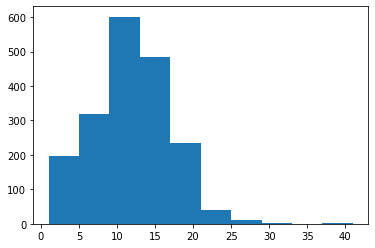

In [63]:
# Plot histogram of Fleet_serviced_count, and select the range where we see the highest service counts in that range.
plt.hist(usage_data_groups['Fleet_service_count'])

C:\Users\Public\Documents\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fleet_service_count', ylabel='Density'>

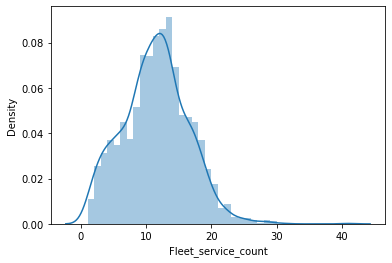

In [65]:
sn.distplot(usage_data_groups['Fleet_service_count'], bins=40)

Add the following columns to the table.

Distance_by_fleet - Average distance traveled by fleet per service, derived by the dividing "Distance_service" and "Fleet_serviced_count"

Time_by_fleet - Average time traveled by fleet per service, derived by dividing "Time_in_service" and "Fleet_serviced_count"

In [72]:
usage_data_groups['Time_in_service'] = usage_data_groups['Age_last_known']-usage_data_groups['Age_initial']

In [73]:
usage_data_groups['Distance_service'] =  usage_data_groups['Distance_lastknown']-usage_data_groups['Distance_initial']

In [75]:
usage_data_groups

,Asset,Age_initial,Age_last_known,Fleet_service_count,Distance_initial,Distance_lastknown,Time_in_service,Distance_service
0,A000204,46,722,15,31449.65,33212.76,676,1763.11
1,A000270,435,617,3,26378.56,27036.77,182,658.21
2,A000463,30,616,18,30451.54,31894.00,586,1442.46
3,A000495,6,695,16,30851.25,32540.25,689,1689.00
4,A001201,395,720,7,26136.39,27187.90,325,1051.51
...,...,...,...,...,...,...,...,...
1889,A998424,516,678,2,26189.20,26923.27,162,734.07
1890,A998861,108,664,10,31938.93,33306.13,556,1367.20
1891,A998987,25,524,17,30849.50,32224.28,499,1374.78
1892,A999836,59,719,12,26511.89,29192.59,660,2680.70


In [76]:
usage_data_groups['Distance_by_fleet '] = usage_data_groups['Distance_service']/usage_data_groups['Fleet_service_count']

In [77]:
usage_data_groups['Time_by_fleet '] = usage_data_groups['Time_in_service']/usage_data_groups['Fleet_service_count']

In [78]:
usage_data_groups

,Asset,Age_initial,Age_last_known,Fleet_service_count,Distance_initial,Distance_lastknown,Time_in_service,Distance_service,Distance_by_fleet,Time_by_fleet
0,A000204,46,722,15,31449.65,33212.76,676,1763.11,117.540667,45.066667
1,A000270,435,617,3,26378.56,27036.77,182,658.21,219.403333,60.666667
2,A000463,30,616,18,30451.54,31894.00,586,1442.46,80.136667,32.555556
3,A000495,6,695,16,30851.25,32540.25,689,1689.00,105.562500,43.062500
4,A001201,395,720,7,26136.39,27187.90,325,1051.51,150.215714,46.428571
...,...,...,...,...,...,...,...,...,...,...
1889,A998424,516,678,2,26189.20,26923.27,162,734.07,367.035000,81.000000
1890,A998861,108,664,10,31938.93,33306.13,556,1367.20,136.720000,55.600000
1891,A998987,25,524,17,30849.50,32224.28,499,1374.78,80.869412,29.352941
1892,A999836,59,719,12,26511.89,29192.59,660,2680.70,223.391667,55.000000


C:\Users\Public\Documents\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time_in_service', ylabel='Density'>

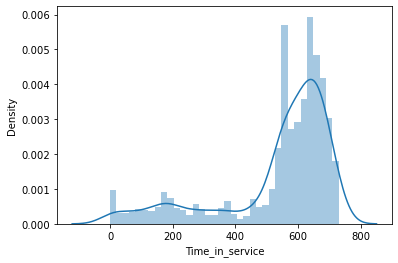

In [79]:
# Draw distplot to check whether distribution of Time_in_service is Left or right skewed?
sn.distplot(usage_data_groups['Time_in_service'])

C:\Users\Public\Documents\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Distance_service', ylabel='Density'>

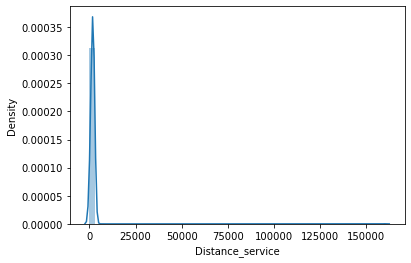

In [80]:
# Draw distplot of the Distance_service column. Do you see any issue with the data points?
sn.distplot(usage_data_groups['Distance_service'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2092bdc1d60>,
 'caps': [<matplotlib.lines.Line2D at 0x2092bdfa820>,
 'boxes': [<matplotlib.lines.Line2D at 0x2092bd74ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x2092be17250>],
 'fliers': [<matplotlib.lines.Line2D at 0x2092be220a0>],
 'means': []}

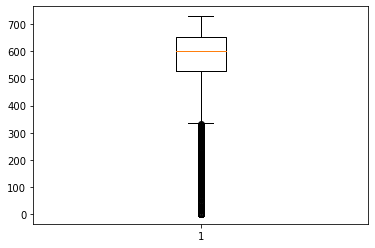

In [81]:
# Draw boxplot for 'Time_in_service', 'Distance_initial', 'Distance_service', 'Fleet_serviced_count' and select the plots which have outliers.
plt.boxplot(usage_data_groups['Time_in_service'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2092c0dd0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2092c0cd3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2092bfcaf40>],
 'medians': [<matplotlib.lines.Line2D at 0x2092bf93430>],
 'fliers': [<matplotlib.lines.Line2D at 0x2092c21b940>],
 'means': []}

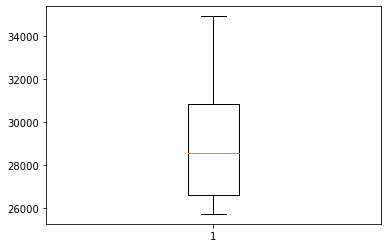

In [82]:
plt.boxplot(usage_data_groups['Distance_initial'])

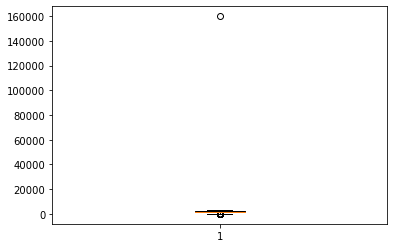

In [88]:
distence_service_box = plt.boxplot(usage_data_groups['Distance_service'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2092c4d7b80>,
 'caps': [<matplotlib.lines.Line2D at 0x2092c4e4280>,
 'boxes': [<matplotlib.lines.Line2D at 0x2092c4d7820>],
 'medians': [<matplotlib.lines.Line2D at 0x2092c4e4940>],
 'fliers': [<matplotlib.lines.Line2D at 0x2092c4e4ca0>],
 'means': []}

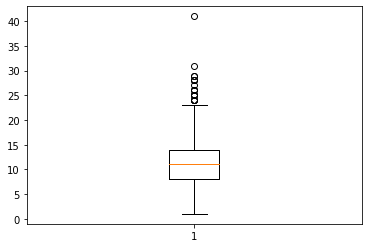

In [85]:
plt.boxplot(usage_data_groups['Fleet_service_count'])

For Time_in_service -- Q1: 526.25, Q3: 654.0, IQR: 127.75, Lower_Fence: 334.625, Upper_Fence: 845.625
For Distance_initial -- Q1: 26616.0475, Q3: 30831.195, IQR: 4215.147499999999, Lower_Fence: 20293.326250000002, Upper_Fence: 37153.916249999995
For Distance_service -- Q1: 1362.5949999999993, Q3: 2214.3949999999986, IQR: 851.7999999999993, Lower_Fence: 84.89500000000044, Upper_Fence: 3492.0949999999975
For Fleet_service_count -- Q1: 8.0, Q3: 14.0, IQR: 6.0, Lower_Fence: -1.0, Upper_Fence: 23.0


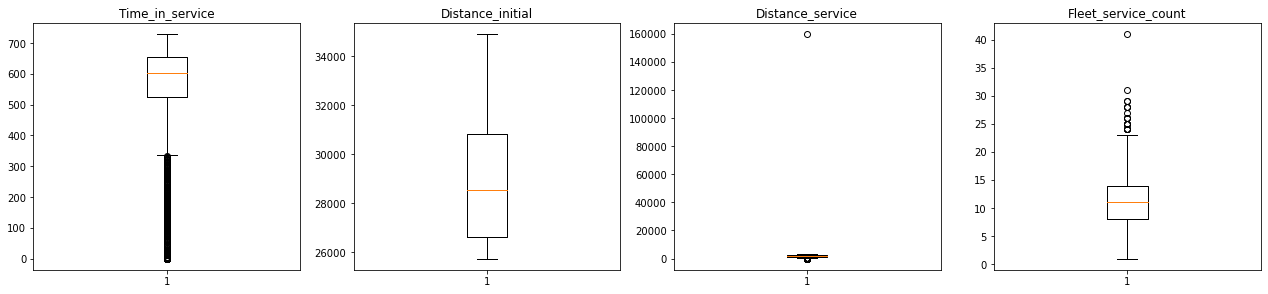

In [87]:
plt.figure(figsize=(22,10))
    
usage_data_groups_outliers = ['Time_in_service','Distance_initial','Distance_service','Fleet_service_count']
for i in enumerate(usage_data_groups_outliers):
    plt.subplot(2,4,i[0]+1)
    box = plt.boxplot(usage_data_groups[i[1]])
    plt.title(i[1])
    #Q1 quantile and Q3 quantile value can be found using below code
    Q1, Q3 = [item.get_ydata()[0] for item in box['whiskers']]
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    print('For {} -- Q1: {}, Q3: {}, IQR: {}, Lower_Fence: {}, Upper_Fence: {}'.format(i[1], Q1, Q3, IQR, Lower_Fence, Upper_Fence))

In [96]:
 # for distance service Upper_Fence: 3492.0949999999975
# let's analyze Distance_service outliers
usage_data_groups.query('Distance_service  >= 3492.0949999999975')

,Asset,Age_initial,Age_last_known,Fleet_service_count,Distance_initial,Distance_lastknown,Time_in_service,Distance_service,Distance_by_fleet,Time_by_fleet
1314,A681673,635,635,1,27319.78,187239.13,0,159919.35,159919.35,0.0


In [97]:
usage_data_groups['Distance_service'] = np.where(
    usage_data_groups['Distance_service']> 3492.0949999999975,
    3492.0949999999975, usage_data_groups['Distance_service']
)

(array([ 99., 160.,  97., 145., 392., 417., 320., 217.,  46.,   1.]),
 array([   0.    ,  349.2095,  698.419 , 1047.6285, 1396.838 , 1746.0475,
        2095.257 , 2444.4665, 2793.676 , 3142.8855, 3492.095 ]),
 <BarContainer object of 10 artists>)

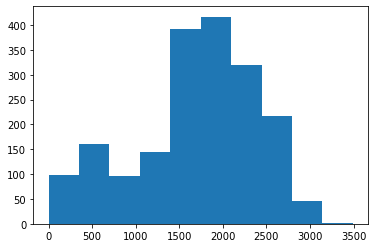

In [100]:
plt.hist(usage_data_groups['Distance_service']) # now outliet is solved

In [101]:
usage_data_groups['Distance_service'].max()

3492.0949999999975

In [102]:
usage_data_groups.query("Asset  == 'A067512'")

,Asset,Age_initial,Age_last_known,Fleet_service_count,Distance_initial,Distance_lastknown,Time_in_service,Distance_service,Distance_by_fleet,Time_by_fleet
113,A067512,5,658,21,33311.96,35792.51,653,2480.55,118.121429,31.095238


<AxesSubplot:xlabel='failure_bin', ylabel='count'>

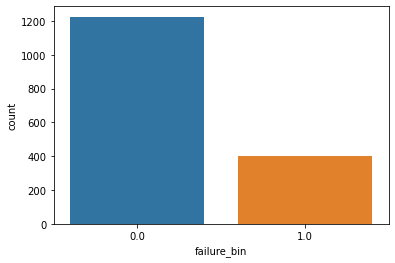

In [105]:
# Draw the barplot for “failure_bin”. Select the right option from below.
sn.barplot('failure_bin', 'count', data = m_failure.groupby('failure_bin')['failure_bin'].agg(['count']).reset_index())

# Scenario 3

In [108]:
# Merge all the the transformed dataset
# usage_data_groups
# maintenance_part_consumption_pivottable_part.shape
# m_failure

In [118]:
maintenance_part_consumption_pivottable_part = maintenance_part_consumption_pivottable_part.reset_index()
column_list = ['Asset']
for a,b in maintenance_part_consumption_pivottable_part.columns.to_flat_index():
    if a== 'Part':
        column_list.append(b+'__UP')
    elif a== 'Quantity':
        column_list.append(b+'__TQ')
maintenance_part_consumption_pivottable_part.columns = column_list

In [119]:
maintenance_part_consumption_pivottable_part.head()

,Asset,R044__UP,R064__UP,R119__UP,R193__UP,R364__UP,R396__UP,R417__UP,R446__UP,R565__UP,...,R364__TQ,R396__TQ,R417__TQ,R446__TQ,R565__TQ,R575__TQ,R606__TQ,R707__TQ,R782__TQ,R783__TQ
0,A000204,0,0,6,44,3,0,0,3,26,...,3,0,0,3,104,0,0,178,0,0
1,A000270,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,106,0,0
2,A000463,0,0,3,36,1,0,0,5,0,...,1,0,0,5,0,0,0,226,0,6
3,A000495,0,0,5,38,9,0,0,20,36,...,13,0,0,36,382,0,0,130,0,0
4,A001201,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,85,0,0


In [111]:
merged_data = m_failure.merge(usage_data_groups, on=['Asset'], how='left')
merged_data

,Asset,failure_bin,Age_initial,Age_last_known,Fleet_service_count,Distance_initial,Distance_lastknown,Time_in_service,Distance_service,Distance_by_fleet,Time_by_fleet
0,A003146,0.0,617,691,3,25836.17,26066.96,74,230.79,76.930000,24.666667
1,A046288,0.0,9,646,12,26654.85,29203.38,637,2548.53,212.377500,53.083333
2,A115725,1.0,27,621,10,31508.88,33112.98,594,1604.10,160.410000,59.400000
3,A187055,0.0,79,696,17,26275.56,28270.04,617,1994.48,117.322353,36.294118
4,A260381,0.0,2,585,9,30958.33,33272.86,583,2314.53,257.170000,64.777778
...,...,...,...,...,...,...,...,...,...,...,...
1619,A845495,0.0,290,662,6,26086.80,27538.31,372,1451.51,241.918333,62.000000
1620,A882703,0.0,138,341,3,33368.56,33983.89,203,615.33,205.110000,67.666667
1621,A920271,0.0,40,717,14,32964.47,34713.87,677,1749.40,124.957143,48.357143
1622,A948155,0.0,56,604,14,28978.15,31271.39,548,2293.24,163.802857,39.142857


In [128]:
merged_data_new = merged_data.merge(maintenance_part_consumption_pivottable_part, on=['Asset'], how='left')

In [129]:
merged_data_new.shape

(1624, 39)

In [130]:
merged_data_new

,Asset,failure_bin,Age_initial,Age_last_known,Fleet_service_count,Distance_initial,Distance_lastknown,Time_in_service,Distance_service,Distance_by_fleet,...,R364__TQ,R396__TQ,R417__TQ,R446__TQ,R565__TQ,R575__TQ,R606__TQ,R707__TQ,R782__TQ,R783__TQ
0,A003146,0.0,617,691,3,25836.17,26066.96,74,230.79,76.930000,...,1,0,0,0,0,0,0,0,0,0
1,A046288,0.0,9,646,12,26654.85,29203.38,637,2548.53,212.377500,...,14,0,0,8,0,0,0,2342,0,0
2,A115725,1.0,27,621,10,31508.88,33112.98,594,1604.10,160.410000,...,4,0,0,4,93,0,0,170,0,0
3,A187055,0.0,79,696,17,26275.56,28270.04,617,1994.48,117.322353,...,18,0,0,4,162,4,0,374,0,0
4,A260381,0.0,2,585,9,30958.33,33272.86,583,2314.53,257.170000,...,6,0,0,0,21,0,0,516,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,A845495,0.0,290,662,6,26086.80,27538.31,372,1451.51,241.918333,...,0,0,0,0,0,0,0,127,0,3
1620,A882703,0.0,138,341,3,33368.56,33983.89,203,615.33,205.110000,...,62,0,0,0,16,0,0,758,0,0
1621,A920271,0.0,40,717,14,32964.47,34713.87,677,1749.40,124.957143,...,20,0,0,13,0,0,0,191,0,0
1622,A948155,0.0,56,604,14,28978.15,31271.39,548,2293.24,163.802857,...,19,0,0,2,300,0,0,241,0,24


In [131]:
merged_data_new.describe()

,failure_bin,Age_initial,Age_last_known,Fleet_service_count,Distance_initial,Distance_lastknown,Time_in_service,Distance_service,Distance_by_fleet,Time_by_fleet,...,R364__TQ,R396__TQ,R417__TQ,R446__TQ,R565__TQ,R575__TQ,R606__TQ,R707__TQ,R782__TQ,R783__TQ
count,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,...,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.0,1624.000000
mean,0.245690,124.129310,671.429803,11.660099,28949.501712,30775.863775,547.300493,1730.039861,257.327539,49.965984,...,8.825123,0.059729,25.054803,11.407635,121.713054,0.336823,0.575739,267.080049,0.0,2.225985
std,0.430628,167.012964,51.244788,4.883257,2301.855839,4644.200778,172.097018,679.305652,3964.986342,17.697981,...,26.400633,2.407015,111.297368,26.906036,236.622252,3.817039,8.248852,273.784557,0.0,8.956596
min,0.000000,0.000000,38.000000,1.000000,25740.480000,25746.020000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,23.000000,643.000000,9.000000,26918.020000,28903.092500,542.750000,1410.007500,115.247333,38.783730,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135.000000,0.0,0.000000
50%,0.000000,57.000000,685.000000,12.000000,28691.490000,30992.610000,607.000000,1799.730000,151.633282,48.332418,...,2.000000,0.000000,0.000000,3.000000,82.000000,0.000000,0.000000,206.000000,0.0,0.000000
75%,0.000000,127.000000,710.000000,15.000000,30866.202500,32632.742500,655.250000,2232.190000,195.242500,59.000000,...,6.000000,0.000000,0.000000,12.000000,162.000000,0.000000,0.000000,374.250000,0.0,1.000000
max,1.000000,710.000000,730.000000,41.000000,34902.350000,187239.130000,730.000000,3492.095000,159919.350000,173.666667,...,473.000000,97.000000,3310.000000,347.000000,4233.000000,112.000000,199.000000,5249.000000,0.0,105.000000


In [132]:
# R782__TQ have all value 0 droped it.
# merged_data_new.drop(['R782__TQ'], axis=1, inplace=True)

Make a new data frame and copy the following columns from the merged dataframe/table.

        "Asset",
        "failure_bin",
        "Fleet_serviced_count",
        "Time_in_service",
        "Distance_service",
        "Distance_by_fleet",
        "Time_by_fleet"

In [204]:
# "Distance_by_fleet",
#     "Time_by_fleet",
New_data_frame = merged_data_new[[
    
    "Asset",
    "failure_bin",
    "Fleet_service_count",
    "Time_in_service",
    "Distance_service",
    
    
]]

In [149]:
maintenance_part_consumption_pivottable_part.columns

Index(['Asset', 'R044__UP', 'R064__UP', 'R119__UP', 'R193__UP', 'R364__UP',
       'R396__UP', 'R417__UP', 'R446__UP', 'R565__UP', 'R575__UP', 'R606__UP',
       'R707__UP', 'R782__UP', 'R783__UP', 'R044__TQ', 'R064__TQ', 'R119__TQ',
       'R193__TQ', 'R364__TQ', 'R396__TQ', 'R417__TQ', 'R446__TQ', 'R565__TQ',
       'R575__TQ', 'R606__TQ', 'R707__TQ', 'R782__TQ', 'R783__TQ'],
      dtype='object')

In [150]:
New_data_frame['Total_failures_quantity'] = merged_data_new[[
    'R044__TQ', 'R064__TQ', 'R119__TQ',
       'R193__TQ', 'R364__TQ', 'R396__TQ', 'R417__TQ', 'R446__TQ', 'R565__TQ',
       'R575__TQ', 'R606__TQ', 'R707__TQ', 'R783__TQ'
]].sum(axis=1)

<ipython-input-150-7adaec4fccaf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_data_frame['Total_failures_quantity'] = merged_data_new[[


In [151]:
New_data_frame

,Asset,failure_bin,Fleet_service_count,Time_in_service,Distance_service,Total_failures_quantity
0,A003146,0.0,3,74,230.79,27
1,A046288,0.0,12,637,2548.53,2373
2,A115725,1.0,10,594,1604.10,317
3,A187055,0.0,17,617,1994.48,609
4,A260381,0.0,9,583,2314.53,578
...,...,...,...,...,...,...
1619,A845495,0.0,6,372,1451.51,174
1620,A882703,0.0,3,203,615.33,1064
1621,A920271,0.0,14,677,1749.40,264
1622,A948155,0.0,14,548,2293.24,643


In [153]:
New_data_frame[New_data_frame['Asset']=='A067512']

,Asset,failure_bin,Fleet_service_count,Time_in_service,Distance_service,Total_failures_quantity
939,A067512,1.0,21,653,2480.55,2221


In [155]:
New_data_frame['Total_failures_uniqueparts'] = merged_data_new[[
    'R044__UP', 'R064__UP', 'R119__UP', 'R193__UP', 'R364__UP',
       'R396__UP', 'R417__UP', 'R446__UP', 'R565__UP', 'R575__UP', 'R606__UP',
       'R707__UP', 'R782__UP', 'R783__UP'
]].sum(axis=1)

<ipython-input-155-f89d72481f45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_data_frame['Total_failures_uniqueparts'] = merged_data_new[[


In [194]:
New_data_frame.head(1)

,Asset,failure_bin,Fleet_service_count,Time_in_service,Distance_service,Total_failures_quantity,Total_failures_uniqueparts
0,A003146,0.0,3,74,230.79,27,20


In [195]:
merged_data_new.head(1)

,Asset,failure_bin,Age_initial,Age_last_known,Fleet_service_count,Distance_initial,Distance_lastknown,Time_in_service,Distance_service,Distance_by_fleet,...,R364__TQ,R396__TQ,R417__TQ,R446__TQ,R565__TQ,R575__TQ,R606__TQ,R707__TQ,R782__TQ,R783__TQ
0,A003146,0.0,617,691,3,25836.17,26066.96,74,230.79,76.93,...,1,0,0,0,0,0,0,0,0,0


In [199]:
#"Distance_by_fleet",
#     "Time_by_fleet"  is not added to index

In [190]:
#Total assets came for maintenance?
#Total assets which had breakdown?
a = New_data_frame.groupby('failure_bin')['Asset'].agg([['Total_asset', 'count']]).reset_index()
a

,failure_bin,Total_asset
0,0.0,1225
1,1.0,399


In [192]:
 New_data_frame.groupby('failure_bin')['Asset'].agg('count')

failure_bin
0.0    1225
1.0     399
Name: Asset, dtype: int64

In [178]:
# Enter Total_failures_quantity for the assets that came for maintenance
b = New_data_frame.groupby('failure_bin')['Total_failures_quantity'].agg([['Total_failures_quantity_sum','sum']]).reset_index()
b

,failure_bin,Total_failures_quantity_sum
0,0.0,566145
1,1.0,234194


In [186]:
# Calculate the average Quantity of parts used and Unique parts used for the type of assets.
b['Total_failures_quantity_sum']/a['Total_asset']

0    462.159184
1    586.952381
dtype: float64

In [187]:
# Enter Total_failures_uniqueparts for the assets which had breakdown.
c = New_data_frame.groupby('failure_bin')['Total_failures_uniqueparts'].agg([['Total_failures_uniqueparts_sum','sum']]).reset_index()
c

,failure_bin,Total_failures_uniqueparts_sum
0,0.0,109029
1,1.0,43547


In [188]:
# Calculate the average Quantity of parts used and Unique parts used for the type of assets.
c['Total_failures_uniqueparts_sum']/a['Total_asset']

0     89.003265
1    109.140351
dtype: float64

In [201]:
New_data_frame.head()

,Asset,failure_bin,Fleet_service_count,Time_in_service,Distance_service,Total_failures_quantity,Total_failures_uniqueparts
0,A003146,0.0,3,74,230.79,27,20
1,A046288,0.0,12,637,2548.53,2373,71
2,A115725,1.0,10,594,1604.10,317,90
3,A187055,0.0,17,617,1994.48,609,97
4,A260381,0.0,9,583,2314.53,578,79


## BiViriate Analysis

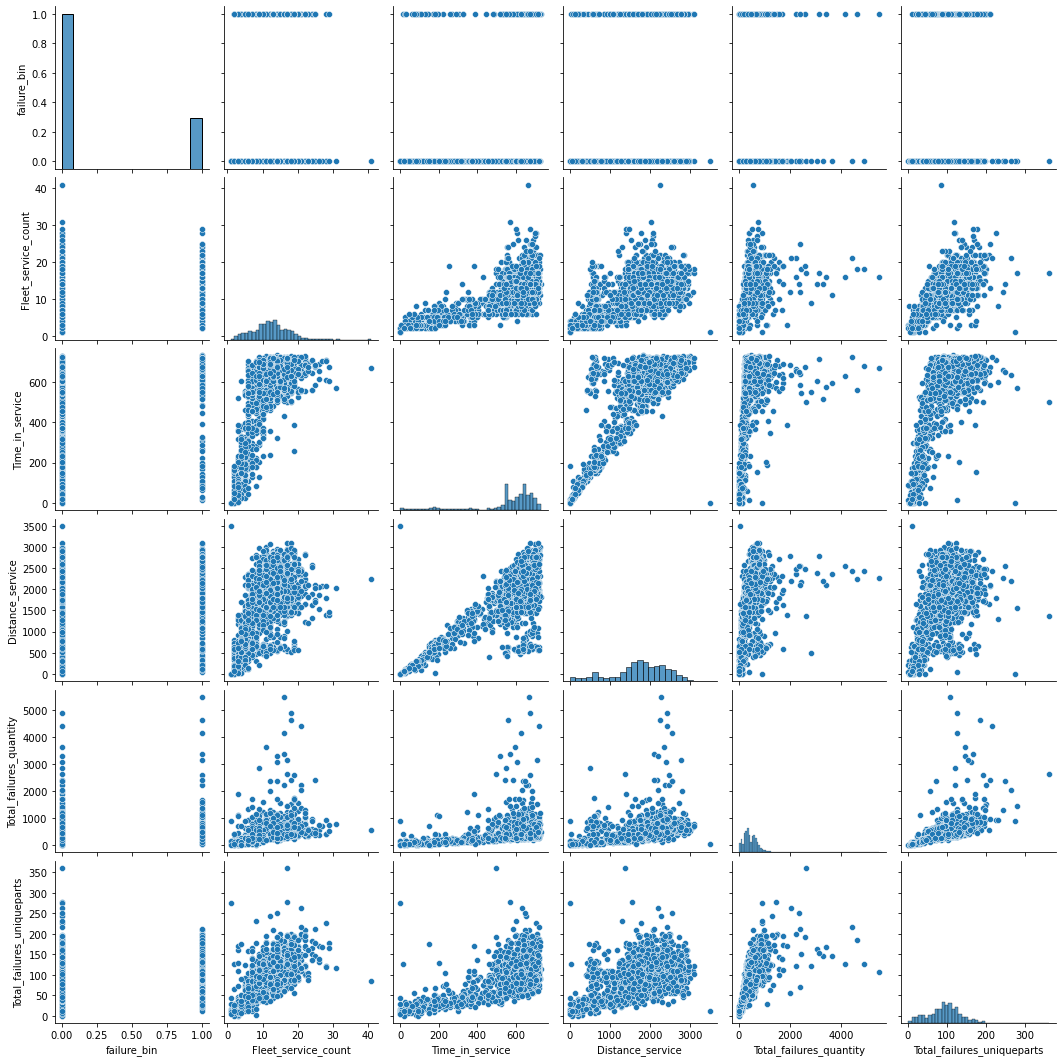

In [200]:
sn.pairplot(New_data_frame)

<AxesSubplot:>

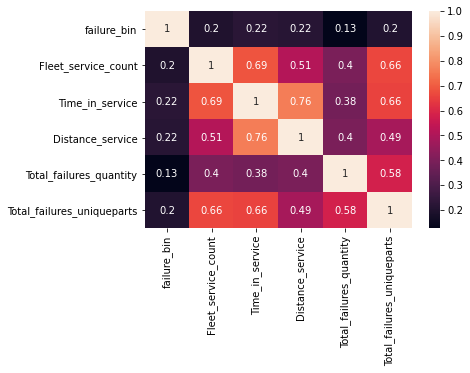

In [203]:
# plt.figure(figsize=(15,15))
sn.heatmap(New_data_frame.corr(), annot=True)